## Project: Assessing the spread and impact of covid-19 across the world.
### Proponent: The World Health Organization (WHO)
### Task: Exploratory Data Analysis
#### Date: 2021-10-22

## Approach
Before we begin the data analysis process, we need must ensure that our analysis is anchored on the project objectives. To do this, we will formulate questions based on the objectives to guide the exploratory analysis process.

### Project Objectives:
1. Track the trend of covid-19 infections/cases and deaths since the outbreak.
2. Identify countries and continents hit hardest by the pandemic.
3. Evaluate effectiveness of vaccines in controlling the spread of covid-19.

### Questions
**Objective 1**
1. What is the trend of new covid-19 cases and deaths in the world since the beginning of the outbreak? 
2. Are the number of new cases and new deaths decreasing or increasing?
3. What is the trend continent-wise?

**Objective 2**
1. Which country has the highest infection rate?
2. Which country has the highest death rate?
3. Which countries have above average infection and death rates?
4. Are there any countries with unusually high infection/death rates (outliers)?
6. Which continents have highest infection/ death rates?
8. What is the influence of continent/countries socio-economic position on infection and death rates?
9. Does the age of a country/continent's population have an effect on the number of infections and deaths?

**Objective 3**
#### Assumption:
Assumming that vaccine rollout had gained sufficient momentum in march 2021.

Keeping this assumption in mind. 

1. What was the trend of infections before and after vaccine rollout?
2. Which countries saw the highest reduction in average covid infections/deaths after vaccine rollout?

These questions are enough to get our analysis started. The next point of action is understand how to evaluate infection rate and mortality rate of a disease. 

In [367]:
# importing requisite libraries
import pandas as pd
import numpy as np
from scipy import stats
import mysql.connector as mysql
from mysql.connector import errorcode
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from datetime import datetime
sns.set_theme(style="white")

%matplotlib notebook

In [2]:
# Establishing connection with our database server
config = {
    'user': 'korir',
    'password': 'Wayne1966!',
    'host': 'localhost',
    'database': 'who_covid_19',
    'raise_on_warnings': True
}

conn = mysql.connect(**config)

In [5]:
# Query to select data from our database

query = '''
        SELECT *
        FROM covid_19
        
        '''

In [13]:
# reading data from database

covid_data = pd.read_sql(query, conn)

In [14]:
# checking data loaded correctly
covid_data.head()

,entry_id,iso_code,continent,location,date_,total_cases,new_cases,total_deaths,new_deaths,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,life_expectancy,human_development_index
0,0,AFG,Asia,Afghanistan,2020-02-24,5,5,0,0,39835428,18.6,2.581,1.337,1803.99,64.83,0.511
1,1,AFG,Asia,Afghanistan,2020-02-25,5,0,0,0,39835428,18.6,2.581,1.337,1803.99,64.83,0.511
2,2,AFG,Asia,Afghanistan,2020-02-26,5,0,0,0,39835428,18.6,2.581,1.337,1803.99,64.83,0.511
3,3,AFG,Asia,Afghanistan,2020-02-27,5,0,0,0,39835428,18.6,2.581,1.337,1803.99,64.83,0.511
4,4,AFG,Asia,Afghanistan,2020-02-28,5,0,0,0,39835428,18.6,2.581,1.337,1803.99,64.83,0.511


In [8]:
covid_data.shape

(118567, 16)

In [211]:
# getting basic information about our data

covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118567 entries, 0 to 118566
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   entry_id                 118567 non-null  int64         
 1   iso_code                 118567 non-null  object        
 2   continent                118567 non-null  object        
 3   location                 118567 non-null  object        
 4   date_                    118567 non-null  datetime64[ns]
 5   total_cases              118567 non-null  int64         
 6   new_cases                118567 non-null  int64         
 7   total_deaths             118567 non-null  int64         
 8   new_deaths               118567 non-null  int64         
 9   population               118567 non-null  int64         
 10  median_age               118567 non-null  float64       
 11  aged_65_older            118567 non-null  float64       
 12  aged_70_older   

### Principles of epidemiology 
The CDC defines morbidity has been defined as any departure, subjective or objective, from a state of physiological or psychological well-being. In practice, morbidity encompasses disease, injury, and disability. Measures of morbidity frequency characterize the number of persons in a population who become ill (incidence) or are ill at a given time (prevalence).

#### Measures of morbidity 
One measure of morbidity is of interest to use is **Incidence rate**,is the proportion of an initially disease-free population that develops disease, becomes injured, or dies during a specified (usually limited) period of time. Also often referred to as ***attack rate, risk**.

**Method for calculating incidence proportion (risk)**  

$$incidence   proportion = \frac{Number of new cases of disease during specified period}{Size of population at start of period}$$

Risk can be evaluated as percentage or expressed per a standard population ( 1 million, 1 hundred thousand, 10 thousand). 

#### Meaures of mortality
The CDC defines mortality rate as a measure of the frequency of occurrence of death in a defined population during a specified interval. Morbidity and mortality measures are often the same mathematically; it’s just a matter of what you choose to measure, illness or death. There are several measures of mortality, crude death rate, cause specific death rate, and age specific death rate. Here we are interested in deaths caused by covid-19 disease, thus the appropriate measure is cause specific mortality rate.

**Cause-specific mortality rate**
The cause-specific mortality rate is the mortality rate from a specified cause for a population. The numerator is the number of deaths attributed to a specific cause. The denominator is the size of the population at the midpoint of the time period. The fraction is usually expressed per 100,000  or 1000,000 population.

*Source:* [CDC Website](https://www.cdc.gov/csels/dsepd/ss1978/index.html)

In [15]:
# incidence proportion per 1000,0000 people

covid_data['morbidity_per_million'] = (covid_data['new_cases']/covid_data['population']) * 1000000

In [16]:
# cause-specific mortality rate per 1000,000 people

covid_data['mortality_per_million'] = (covid_data['new_deaths']/covid_data['population']) * 1000000

In [19]:
# inspecting the new columns

covid_data[['location', 'morbidity_per_million', 'mortality_per_million']]

,location,morbidity_per_million,mortality_per_million
0,Afghanistan,0.125516,0.000000
1,Afghanistan,0.000000,0.000000
2,Afghanistan,0.000000,0.000000
3,Afghanistan,0.000000,0.000000
4,Afghanistan,0.000000,0.000000
...,...,...,...
118562,Zimbabwe,9.342592,0.132519
118563,Zimbabwe,6.095876,0.198779
118564,Zimbabwe,9.475111,0.463817
118565,Zimbabwe,2.252824,0.000000


## Objective 1: 
**Track the trend of covid-19 infections/cases and deaths since the outbreak**

### Question 1 & 2:
***What is the trend of covid-19 new cases (infection_rate) in the world since January 2020?***  
To answer this question we will calculate the average monthly morbidity rates for the whole world. We will use a areaplot to visualize the trend.

In [209]:
# first extracting our measures of morbidity and mortality
epid_data = covid_data.loc[:, ['date_', 'new_cases', 'new_deaths', 'morbidity_per_million', 'mortality_per_million']]

In [214]:
# group our infection and death data by month and get average

avg_epid_data = epid_data.groupby(epid_data.date_.dt.to_period("M")).mean()

In [215]:
# inspecting our data

avg_epid_data

,new_cases,new_deaths,morbidity_per_million,mortality_per_million
date_,,,,
2020-01,32.422145,0.678201,0.044157,0.000470
2020-02,61.593137,2.225490,0.229922,0.026889
2020-03,184.804724,9.760758,12.591846,0.445713
2020-04,439.510506,35.874292,17.232833,0.984714
2020-05,505.266250,26.065867,17.142629,0.530679
2020-06,765.199283,26.002330,22.578236,0.505874
2020-07,1239.219736,30.530697,30.256480,0.658559
2020-08,1370.650191,31.825876,32.324881,0.671457
2020-09,1524.004301,29.544444,43.066263,0.648665


<IPython.core.display.Javascript object>


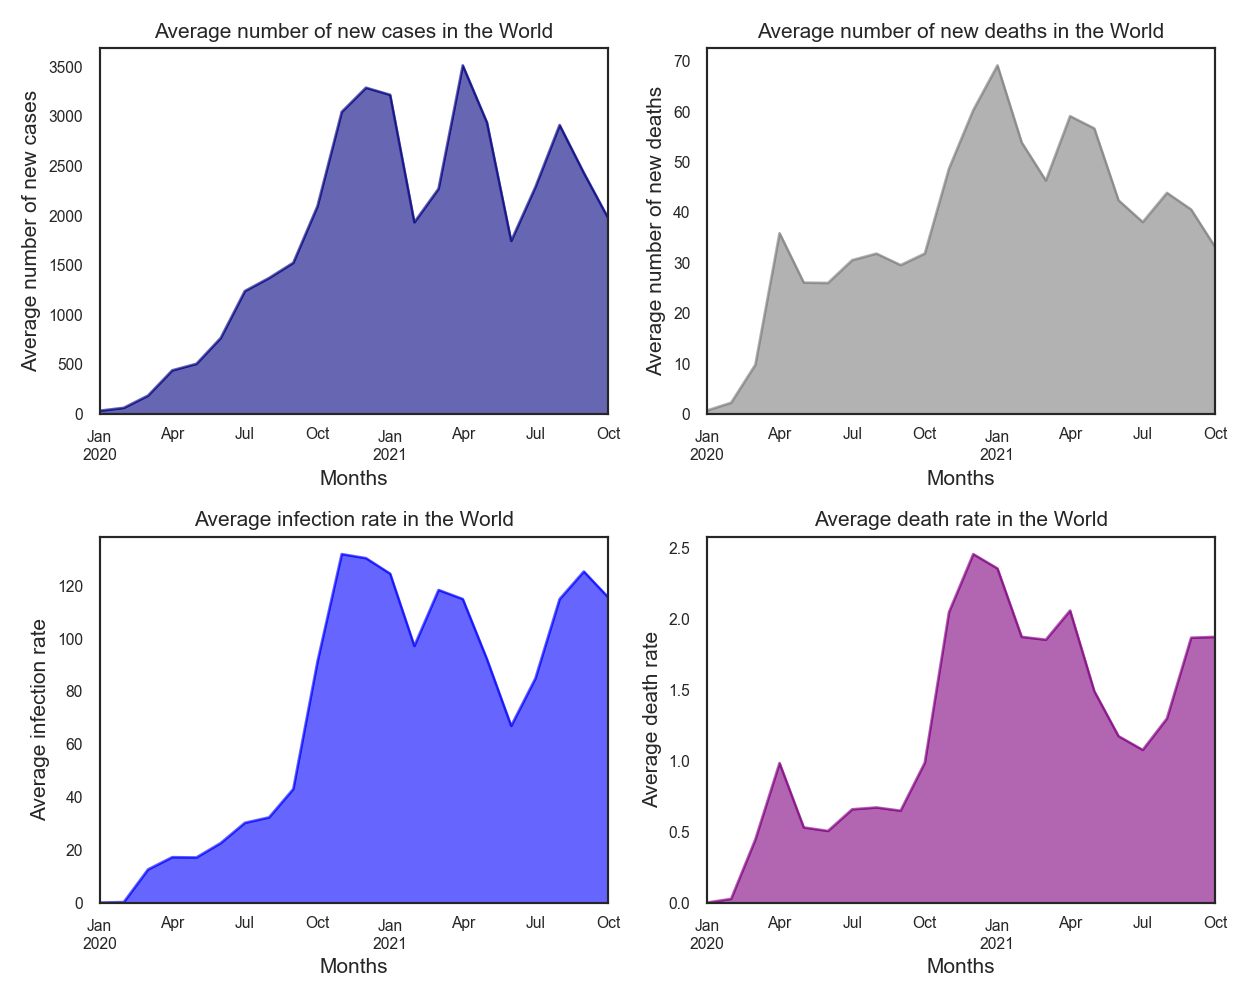

<AxesSubplot:title={'center':'Average death rate in the World'}, xlabel='Months', ylabel='Average death rate'>

In [325]:
# creating subplots 
fig, axes = plt.subplots(2, 2, figsize=(10,8), tight_layout=True)
font = FontProperties()
font.set_family('Arial')
for axe in axes:
    for ax in axe:
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.tick_params(axis='both', which='minor', labelsize=8)

# plotting area graph to visualize trend of new cases

avg_epid_data['new_cases'].plot(kind='area', ax=axes[0][0], 
                                title='Average number of new cases in the World', 
                                xlabel='Months', ylabel='Average number of new cases', 
                                alpha=0.6, color='navy', fontsize=9)

# plotting area graph for new deaths

avg_epid_data['new_deaths'].plot(kind='area', ax=axes[0][1], 
                                title='Average number of new deaths in the World', 
                                xlabel='Months', ylabel='Average number of new deaths', 
                                alpha=0.6, color='grey', fontsize=9)

# Graph of average morbidity_per_million over time 
avg_epid_data['morbidity_per_million'].plot(kind='area', ax=axes[1][0], 
                                title='Average infection rate in the World', 
                                xlabel='Months', ylabel='Average infection rate',
                                alpha=0.6, color='blue', fontsize=9)
# Graph of avergae mortality_per_million over time
avg_epid_data['mortality_per_million'].plot(kind='area', ax=axes[1][1], 
                                title='Average death rate in the World', 
                                xlabel='Months', ylabel='Average death rate', 
                                alpha=0.6, color='purple', fontsize=9)

### What does the data suggest?
#### Average number of new cases fluctuates periodically.
The Data suggests a sharp increase in the average number new cases from January 2020 to November.In December 2020 the average number of cases reported began declining with a steep decline from January 2021 to February. Since March there was a sharp increase followed by a sharp drop in the average new cases reported worldwide. Generally, starting November 2020, the average number of new cases reported fluctuates periodically. This is either due to new variants of the disease or a consequence of some countries rolling back covid-19 control measures such as lock-downs and mask mandates. 

#### Average number of reported new deaths is on the decline.
The data shows that the average number of new deaths reported increased from January 2020 and peaked in January 2021. Starting January the number of reported death has been on a steady decline, with lowest numbers reported in October. 

## Objective 2
**Identify countries and continents hit hardest by the pandemic.**

### Question 1 - Question 4.

In [326]:
# Calculating average morbidity and mortality rates per country

avg_morb_and_mort_rates_per_country = covid_data.loc[:, ['location', 'morbidity_per_million', 'mortality_per_million']].groupby('location').mean()

In [328]:
# checking resulting daataframe
avg_morb_and_mort_rates_per_country.head()

,morbidity_per_million,mortality_per_million
location,,
Afghanistan,6.505092,0.302325
Albania,102.993432,1.630157
Algeria,7.665267,0.219276
Andorra,333.810130,2.829268
Angola,3.212410,0.085031


### Countries with highest infection and death rates
To identify countries with highest infection rates we will sort the dataframe by the morbidity_per_million column. The same shall apply for the countries with highest mortality/death rates.

In [331]:
# 10 Countries with highest infection rates
avg_morb_and_mort_rates_per_country.sort_values('morbidity_per_million', ascending=False).head(10)

,morbidity_per_million,mortality_per_million
location,,
Seychelles,380.289736,2.070764
Montenegro,377.847383,5.554921
Andorra,333.810130,2.829268
Georgia,275.916526,3.959924
San Marino,270.005466,4.489402
Maldives,269.320782,0.741439
Czechia,264.514893,4.730196
Bahrain,262.704249,1.323847
Serbia,252.235717,2.187516


In [334]:
# 10 Countries with highest death rates 
avg_morb_and_mort_rates_per_country.sort_values('mortality_per_million', ascending=False).head(10)

,morbidity_per_million,mortality_per_million
location,,
Peru,100.106466,9.142846
Bosnia and Herzegovina,126.465215,5.760344
Montenegro,377.847383,5.554921
North Macedonia,157.723288,5.548635
Bulgaria,133.067319,5.482052
Hungary,145.826454,5.312566
Czechia,264.514893,4.730196
Brazil,167.641385,4.705432
San Marino,270.005466,4.489402


**Highest infection rate**
The data shows that Seychelles has the highest infection rate per million people with 380 people infected for every million residents.
**Highest death rate**
When it comes to the number of deaths per million, Peru has the highest number at an average of 9 people succumbing to the disease per million. 

### Distribution of average morbidity and mortality rates

<IPython.core.display.Javascript object>


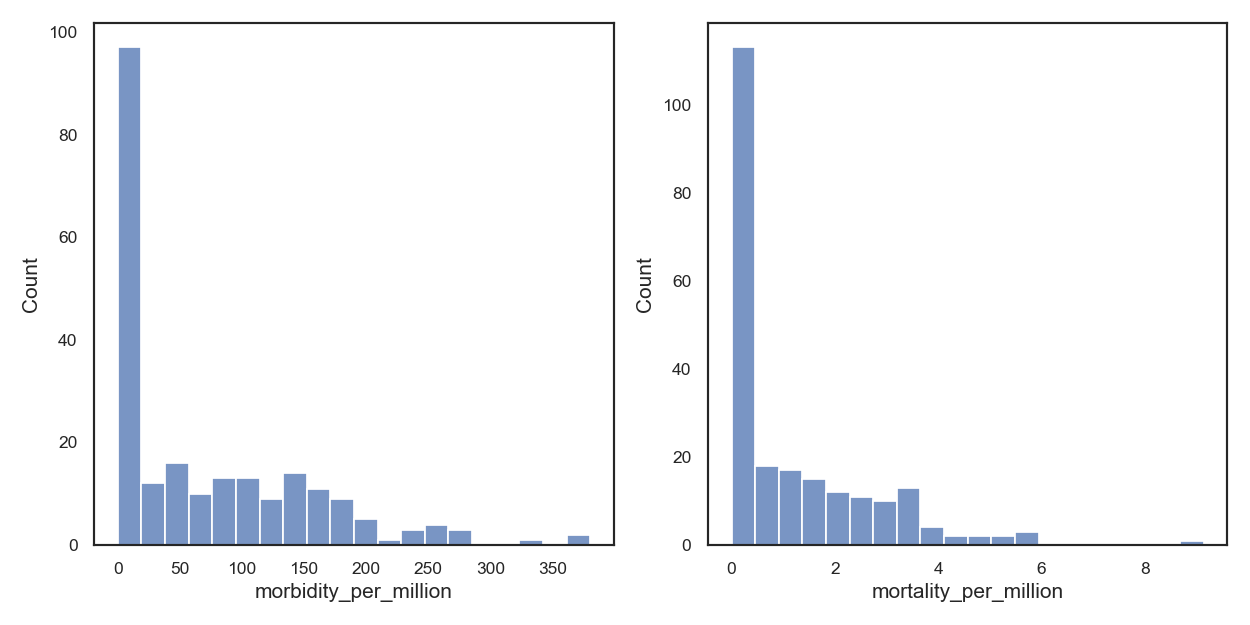

<AxesSubplot:xlabel='mortality_per_million', ylabel='Count'>

In [364]:
fig1, axi = plt.subplots(1,2, figsize=( 10,5), tight_layout=True )
font = FontProperties()
font.set_family('Arial')
for ax in axi:
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.tick_params(axis='both', which='minor', labelsize=8)

sns.histplot(data=avg_morb_and_mort_rates_per_country['morbidity_per_million'], bins=20, ax=axi[0])
sns.histplot(data=avg_morb_and_mort_rates_per_country['mortality_per_million'], bins=20, ax=axi[1])

In [361]:
# summary statistics for average morbidity 
avg_morb_and_mort_rates_per_country['morbidity_per_million'].describe()

count    223.000000
mean      70.732464
std       81.784091
min        0.000000
25%        3.241531
50%       39.034665
75%      126.322703
max      380.289736
Name: morbidity_per_million, dtype: float64

In [363]:
# summary statistics for average mortality
avg_morb_and_mort_rates_per_country['mortality_per_million'].describe()

count    223.000000
mean       1.183554
std        1.503240
min        0.000000
25%        0.043570
50%        0.417295
75%        2.021968
max        9.142846
Name: mortality_per_million, dtype: float64

<IPython.core.display.Javascript object>


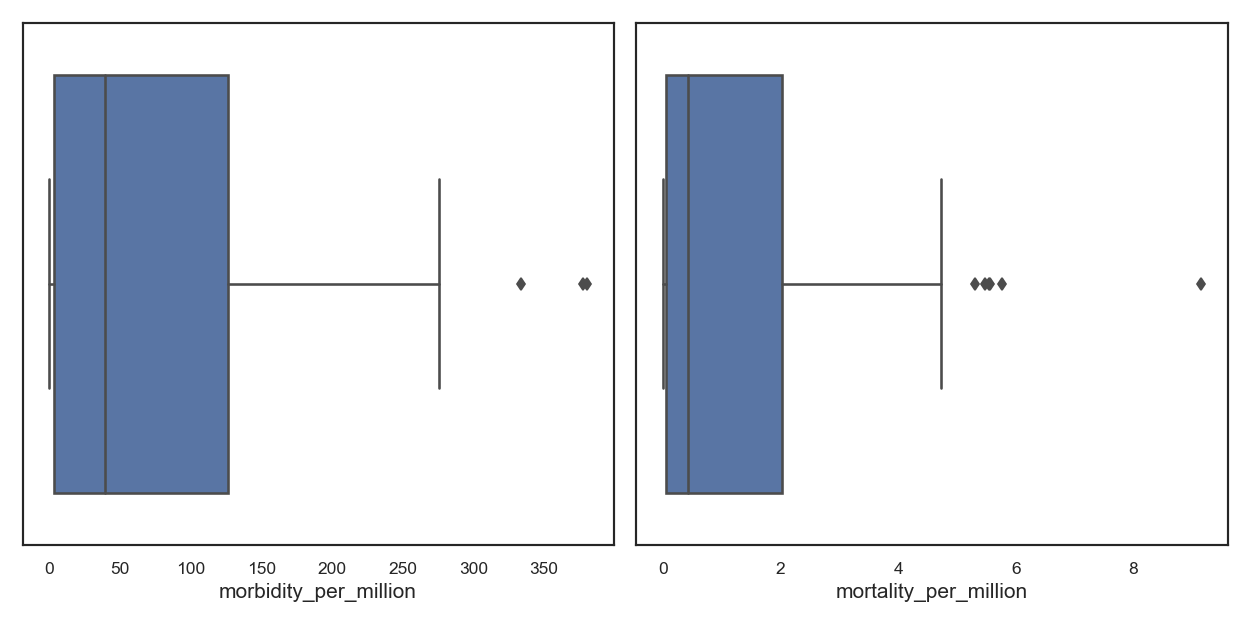

<AxesSubplot:xlabel='mortality_per_million'>

In [365]:
# Using boxplots to detect outliers
fig1, axl = plt.subplots(1,2, figsize=( 10,5), tight_layout=True )
font = FontProperties()
font.set_family('Arial')
for ax in axl:
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.tick_params(axis='both', which='minor', labelsize=8)

sns.boxplot(x=avg_morb_and_mort_rates_per_country['morbidity_per_million'],ax=axl[0])
sns.boxplot(x=avg_morb_and_mort_rates_per_country['mortality_per_million'],ax=axl[1])

### Interpreting Histograms and boxplots for morbidity and mortality 
#### Histograms

#### Box Plots
Our box plots for both morbidity_per_million and mortality_per_million indicate the presence of a several outliers. The plot for morbidity suggests that the data is skewed to the right. The box plot for mortality per million also shows that the distribution of deaths is skewed to the right. 

### Tchebysheff's Theorem and Empirical Rule
To guide our segmetation of risk level we will use Tchebysheff's theorem. According to the theorem, 75% to 95% of of observations should be within two standard deviations of the median. For our analysis, we will isolate countries that match this criteria and term them as "high risk countries". The theorem further states that any observation beyond three standard deviations of the median is an outlier. For both morbidity and mortality per million, we will term countries outside three standard deviations of the median as "extereme high risk countries".

### Using z-scores to isolate outliers 
With z-scores we can isolate 'high risk countries' and 'extreme high risk countries' where morbidity or mortality meets the following criteria. 

**Definition**
1. *High risk*  --- 2 < z-score < 3
2. *Extemely high risk*  ---  z-score > 3

### High Risk Countries

In [370]:
# function calculates z-score
def z_score_calc(observation, mean, standard_deviation):
    '''
    Function returns z-score of a observation/datapoint given mean and standard deviation.
    '''
    return ((observation-mean)/standard_deviation)

In [376]:
# Calculation z_score for avg morbidity
avg_morb_and_mort_rates_per_country['z_score_avg_morbidity'] = avg_morb_and_mort_rates_per_country['morbidity_per_million'].apply(z_score_calc, args=(avg_morb_and_mort_rates_per_country['morbidity_per_million'].mean(), avg_morb_and_mort_rates_per_country['morbidity_per_million'].std()))

In [380]:
# calculation of z-scores for avg mortality
avg_morb_and_mort_rates_per_country['z_score_avg_mortality'] = avg_morb_and_mort_rates_per_country['mortality_per_million'].apply(z_score_calc, args=(avg_morb_and_mort_rates_per_country['mortality_per_million'].mean(), avg_morb_and_mort_rates_per_country['mortality_per_million'].std()))

In [382]:
# inspecting our dataframe to confirm z-scores 
avg_morb_and_mort_rates_per_country.head()

,morbidity_per_million,mortality_per_million,z_score_avg_morbidity,z_score_avg_mortality
location,,,,
Afghanistan,6.505092,0.302325,-0.785328,-0.586219
Albania,102.993432,1.630157,0.394465,0.297094
Algeria,7.665267,0.219276,-0.771143,-0.641467
Andorra,333.810130,2.829268,3.216734,1.094779
Angola,3.212410,0.085031,-0.825589,-0.730770


In [405]:
# Getting list of countries with high morbidity rates (2 < z-score_avg_morbidity < 3)
high_morbidity_risk_countries = avg_morb_and_mort_rates_per_country[(avg_morb_and_mort_rates_per_country['z_score_avg_morbidity'] > 2) & (avg_morb_and_mort_rates_per_country['z_score_avg_morbidity'] < 3) ]['morbidity_per_million'] 
high_morbidity_risk_countries.sort_values(ascending=False)

location
Georgia       275.916526
San Marino    270.005466
Maldives      269.320782
Czechia       264.514893
Bahrain       262.704249
Serbia        252.235717
Israel        247.341649
Slovenia      237.445908
Name: morbidity_per_million, dtype: float64

In [404]:
# Getting list countries high mortality rates (2 < z-score_avg_mortality < 3)
high_mortality_risk_countries = avg_morb_and_mort_rates_per_country[(avg_morb_and_mort_rates_per_country['z_score_avg_mortality'] > 2) & (avg_morb_and_mort_rates_per_country['z_score_avg_mortality'] < 3)]['mortality_per_million']
high_mortality_risk_countries.sort_values(ascending=False)

location
Montenegro         5.554921
North Macedonia    5.548635
Bulgaria           5.482052
Hungary            5.312566
Czechia            4.730196
Brazil             4.705432
San Marino         4.489402
Colombia           4.193164
Name: mortality_per_million, dtype: float64

#### High morbidity risk
There are eight countries with high morbidity risk. Georgia, San Marino, Maldives, Czechia, Bahrain, Serbia, Israel and Slovenia

#### High Mortality risk
There are ten countries with high mortality risk namely: Brazil, Bulgaria, Colombia, Czechia, Hungary, Montenegro, North Macedonia and San Marino


### Extremely High Risk Countries

In [407]:
# Getting list of countries with extremly high morbidity rates ( z-score_avg_morbidity > 3)
extreme_morbidity_risk_countries = avg_morb_and_mort_rates_per_country[avg_morb_and_mort_rates_per_country['z_score_avg_morbidity'] > 3 ]['morbidity_per_million'] 
extreme_morbidity_risk_countries.sort_values(ascending=False)

location
Seychelles    380.289736
Montenegro    377.847383
Andorra       333.810130
Name: morbidity_per_million, dtype: float64

In [409]:
# Getting list of countries with extremly high mortality rates ( z-score_avg_mortality > 3)
extreme_mortality_risk_countries = avg_morb_and_mort_rates_per_country[avg_morb_and_mort_rates_per_country['z_score_avg_mortality'] > 3 ]['mortality_per_million'] 
extreme_mortality_risk_countries.sort_values(ascending=False)

location
Peru                      9.142846
Bosnia and Herzegovina    5.760344
Name: mortality_per_million, dtype: float64

#### Extremely high morbidity risk
There are three countries with extremely high morbidity risk. Seychelles, Montenegro and Andorra

#### Extremely high Mortality risk
There are two  countries with extremely high mortality risk namely: Peru and Bosia & Herzegovina

### Question 5:
For countries with above average infection rates, are their any commonalities/ shared characteristics?
For this particular analysis, we shall try identify if there exists relationships between our variables. We will pay keen attention to how the following age and socio-economic factors affect infection and death rates. We will group our data by country and find the average infection and death rate. 

**Variables of interest**
1. Median_age
2. age_65_older
3. aged_70_older
4. gdp_per_capita
5. life_expectancy
6. human_development_index

### Age
How might the age of a population influence covid-19 infection and death rates?

In [416]:
# average per country 
avg_per_country = covid_data.groupby('location').mean() 

<IPython.core.display.Javascript object>


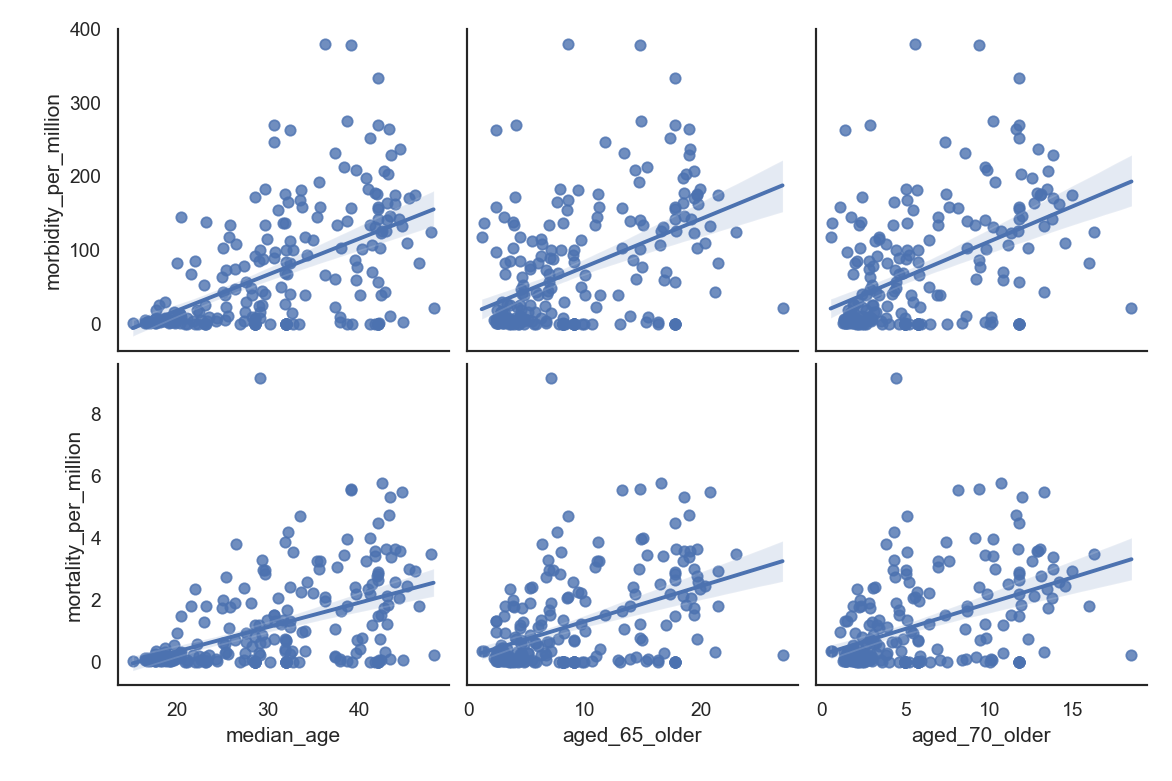

In [426]:
# relationship between median_age, aged_65_older, aged_70_older and morbidity rate
sns.pairplot(data=avg_per_country, x_vars=['median_age','aged_65_older', 'aged_70_older'], 
             y_vars=['morbidity_per_million', 'mortality_per_million'], kind='reg' )

In [428]:

# 10 Countries with highest infection rates
high_morb_countries = avg_morb_and_mort_rates_per_country.sort_values('morbidity_per_million', ascending=False).head(10).index
# 10 Countries with highest death rates
high_mort_countries = avg_morb_and_mort_rates_per_country.sort_values('mortality_per_million', ascending=False).head(10).index

In [433]:
# Ages of countries with highest infection rates

avg_covid_data.loc[high_morb_countries, ['morbidity_per_million','median_age', 'aged_65_older', 'aged_70_older']]

,morbidity_per_million,median_age,aged_65_older,aged_70_older
location,,,,
Seychelles,380.289736,36.2,8.606,5.586
Montenegro,377.847383,39.1,14.762,9.395
Andorra,333.810130,42.1,17.754,11.801
Georgia,275.916526,38.7,14.864,10.244
San Marino,270.005466,42.1,17.754,11.801
Maldives,269.320782,30.6,4.120,2.875
Czechia,264.514893,43.3,19.027,11.580
Bahrain,262.704249,32.4,2.372,1.387
Serbia,252.235717,41.2,17.366,11.801


In [432]:
# Ages of countries with highest death rates

avg_covid_data.loc[high_mort_countries, ['mortality_per_million','median_age', 'aged_65_older', 'aged_70_older']]

,mortality_per_million,median_age,aged_65_older,aged_70_older
location,,,,
Peru,9.142846,29.1,7.151,4.455
Bosnia and Herzegovina,5.760344,42.5,16.569,10.711
Montenegro,5.554921,39.1,14.762,9.395
North Macedonia,5.548635,39.1,13.260,8.160
Bulgaria,5.482052,44.7,20.801,13.272
Hungary,5.312566,43.4,18.577,11.976
Czechia,4.730196,43.3,19.027,11.580
Brazil,4.705432,33.5,8.552,5.060
San Marino,4.489402,42.1,17.754,11.801


### Positive correlation between age and both infection and death rates.
Regression plots show that there is a positive correlation between age and both morbidity and mortality rates. Countries with aging populations have higher infection and death rates. Let's examine the median ages of the countries with highest infection and death rates.

A look at the median age of the countries with highest infection and death rates shows except for a few outliers a majority of the countries have aging population who are likely more susceptible to the infection and ultimately death from covid-19.

### Socio-Economic Factors
How do the following factors influence the infection/death rate

<IPython.core.display.Javascript object>


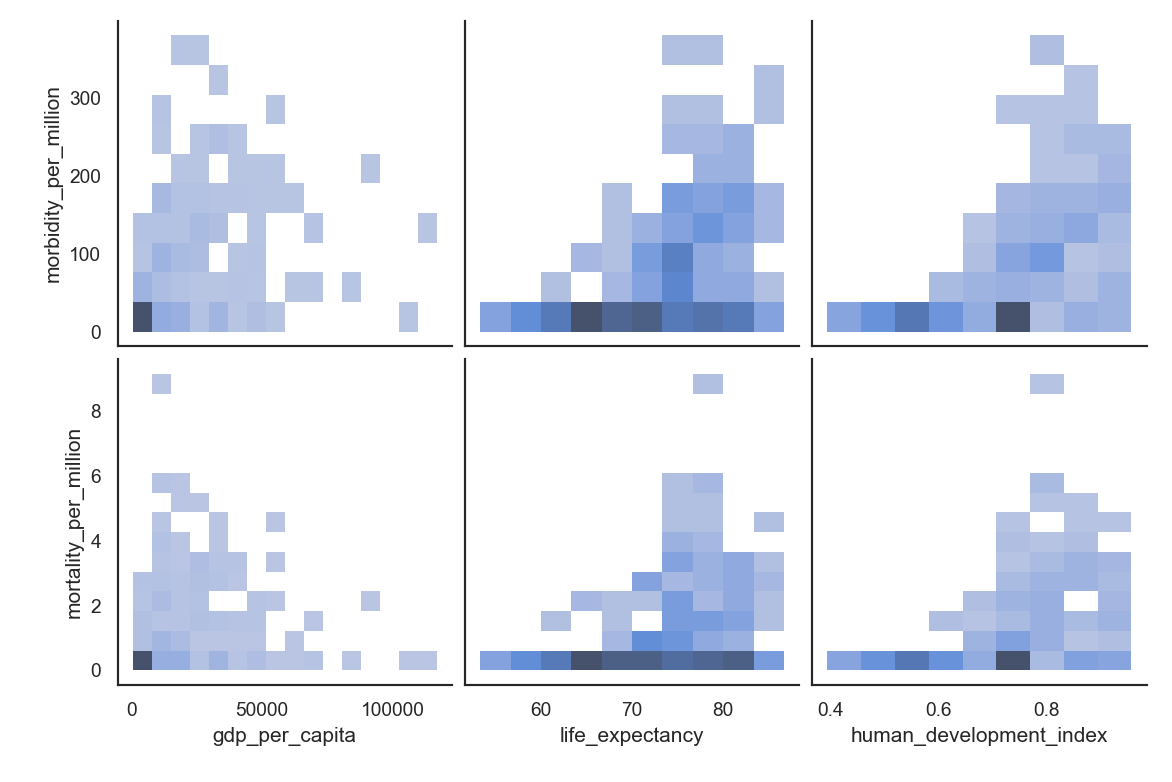

In [436]:
# Visualizing the relationship between gdp_per_capita, life_expectancy and human_development index on the infection and death rate

sns.pairplot(data=avg_per_country, x_vars=['gdp_per_capita', 'life_expectancy', 'human_development_index'], 
             y_vars=['morbidity_per_million', 'mortality_per_million'], kind='hist')

<AxesSubplot:xlabel='population', ylabel='morbidity_per_million'>

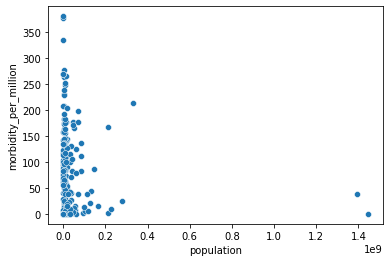

In [90]:
sns.scatterplot(data=avg_morb_and_mort_rates, x='population', y='morbidity_per_million')

<AxesSubplot:xlabel='population', ylabel='mortality_per_million'>

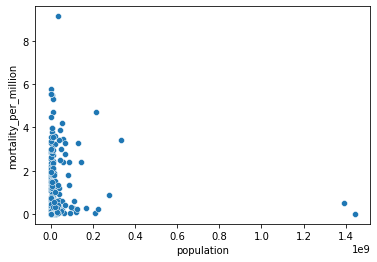

In [91]:
sns.scatterplot(data=avg_morb_and_mort_rates, x='population', y='mortality_per_million')

In [65]:
from datetime import datetime

In [81]:
datetime.strptime('2020-08-20', '%Y-%m-%d').date()

datetime.date(2020, 8, 20)

## Effect of vaccine rollout

The UK began administering vaccines in December 2020. To understand the impact the vaccine had on the fight against covid-19 we can compare the morbidty and mortality rates before and after vaccine roll-out.

In [106]:
covid_before_vaccines = covid_data[covid_data['date_'] < datetime.strptime('2021-01-20', '%Y-%m-%d').date()].sort_values('date_', ascending=False)

In [113]:
avg_rates_bf_vacc = covid_before_vaccines.loc[:, ['population','location','median_age', 'life_expectancy','gdp_per_capita','morbidity_per_million', 'mortality_per_million']].groupby('location').mean()

In [108]:
avg_rates_bf_vacc.sort_values('morbidity_per_million', ascending=False).head()

,population,gdp_per_capita,morbidity_per_million,mortality_per_million
location,,,,
Andorra,77354.0,33483.3,366.840024,3.670794
Montenegro,628051.0,16409.3,289.733855,3.859477
Czechia,10724553.0,32605.9,252.630239,4.113408
San Marino,34010.0,56861.5,251.369590,5.862585
Luxembourg,634814.0,94278.0,231.677424,2.649094


In [109]:
avg_rates_bf_vacc.sort_values('mortality_per_million', ascending=False).head()

,population,gdp_per_capita,morbidity_per_million,mortality_per_million
location,,,,
Peru,33359415.0,12236.7,82.576972,7.608359
San Marino,34010.0,56861.5,251.369590,5.862585
Belgium,11632334.0,42658.6,166.852430,5.034106
Slovenia,2078723.0,31400.8,205.967867,4.403172
Bosnia and Herzegovina,3263459.0,11713.9,113.007209,4.304246


In [110]:
avg_rates_bf_vacc.sort_values('population', ascending=False).head()

,population,gdp_per_capita,morbidity_per_million,mortality_per_million
location,,,,
China,1.444216e+09,15308.70,0.167502,0.008785
India,1.393409e+09,6426.67,21.359866,0.307866
United States,3.329151e+08,54225.40,201.242047,3.377392
Indonesia,2.763618e+08,11188.70,10.357018,0.296958
Pakistan,2.251999e+08,5034.71,7.061510,0.149403


<AxesSubplot:xlabel='gdp_per_capita', ylabel='mortality_per_million'>

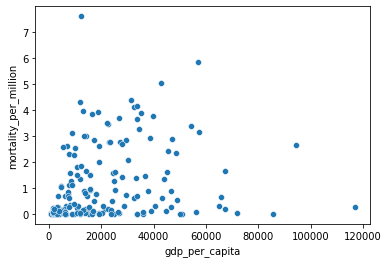

In [111]:
# let's explore the relationship between gdp and (mortality & morbidity rates)

sns.scatterplot(data=avg_rates_bf_vacc, x='gdp_per_capita', y='mortality_per_million')

<AxesSubplot:xlabel='gdp_per_capita', ylabel='morbidity_per_million'>

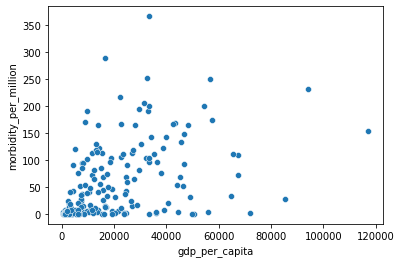

In [112]:
# relationship between gdp_per_capita and morbidity date
sns.scatterplot(data=avg_rates_bf_vacc, x='gdp_per_capita', y='morbidity_per_million',  )

<AxesSubplot:xlabel='median_age', ylabel='mortality_per_million'>

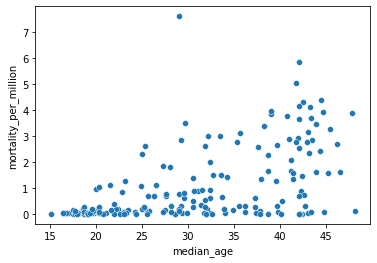

In [114]:
# checking for the influence of median_age of morbidity and mortality rates

sns.scatterplot(data=avg_rates_bf_vacc, x='median_age', y='mortality_per_million')

<AxesSubplot:xlabel='median_age', ylabel='morbidity_per_million'>

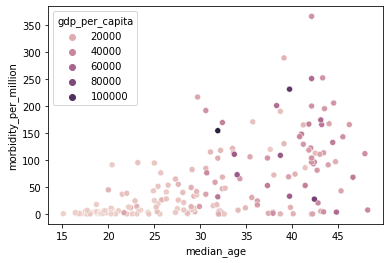

In [120]:
# checking for the influence of median_age of morbidity and mortality rates

sns.scatterplot(data=avg_rates_bf_vacc, x='median_age', y='morbidity_per_million', hue='gdp_per_capita')

<AxesSubplot:xlabel='life_expectancy', ylabel='mortality_per_million'>

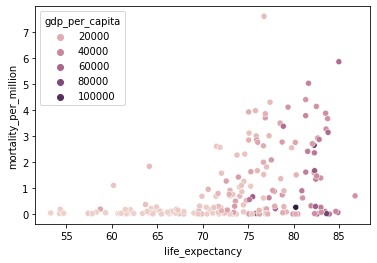

In [121]:
# checking for the influence of a countries life expectancy on mortality rates

sns.scatterplot(data=avg_rates_bf_vacc, x='life_expectancy', y='mortality_per_million', hue='gdp_per_capita')

<AxesSubplot:xlabel='life_expectancy', ylabel='morbidity_per_million'>

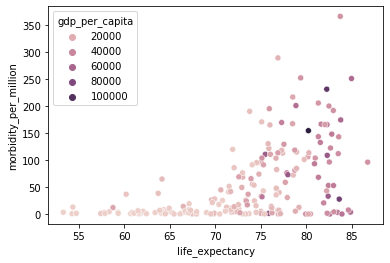

In [122]:
# checking for the influence of a countries life expectancy on mortality rates
sns.scatterplot(data=avg_rates_bf_vacc, x='life_expectancy', y='morbidity_per_million', hue='gdp_per_capita')

**Which Countries had the highest covid-19 deaths and infections in 2020?**

In [135]:
covid_data_2020 = covid_data[covid_data['date_'] <= datetime.strptime('2020-12-31', '%Y-%m-%d').date()]

In [136]:
avg_infection_rates_2020 = covid_data_2020.groupby('location')[['morbidity_per_million', 'mortality_per_million']].mean()

In [138]:
avg_infection_rates_2020.sort_values('morbidity_per_million',ascending=False).head(10)

,morbidity_per_million,mortality_per_million
location,,
Andorra,341.160948,3.560383
Montenegro,264.897223,3.744480
Luxembourg,232.853200,2.483299
San Marino,223.444532,5.650762
Czechia,214.092050,3.449729
Liechtenstein,191.614812,3.796061
Panama,189.008028,3.080312
Georgia,184.335364,2.030429
Slovenia,175.937126,3.884524


In [139]:
avg_infection_rates_2020.sort_values('mortality_per_million',ascending=False).head(10)

,morbidity_per_million,mortality_per_million
location,,
Peru,83.142896,7.622724
San Marino,223.444532,5.650762
Belgium,167.402097,5.056533
Bosnia and Herzegovina,112.610577,4.109320
Slovenia,175.937126,3.884524
North Macedonia,129.067201,3.876864
Liechtenstein,191.614812,3.796061
Montenegro,264.897223,3.744480
Bulgaria,98.087394,3.673925


### Tracking covid-19 infection and death rates over months

In [147]:
# converting date_column to datetime
covid_data['date_'] = pd.to_datetime(covid_data.date_)

In [149]:
covid_data.date_.dt.to_period("M")

0         2020-02
1         2020-02
2         2020-02
3         2020-02
4         2020-02
           ...   
118562    2021-10
118563    2021-10
118564    2021-10
118565    2021-10
118566    2021-10
Name: date_, Length: 118567, dtype: period[M]

In [151]:
# grouping 

monthly_covid_data = covid_data.groupby(['location', covid_data.date_.dt.to_period("M")]).mean()

In [152]:
monthly_covid_data.head()

entry_id   total_cases   new_cases  total_deaths  \
location    date_                                                       
Afghanistan 2020-02       2.5      5.000000    0.833333      0.000000   
            2020-03      21.0     36.806452    5.193548      0.677419   
            2020-04      51.5    838.400000   55.366667     27.066667   
            2020-05      82.0   7184.516129  430.741935    158.838710   
            2020-06     112.5  25056.166667  542.166667    499.400000   

                     new_deaths  population  median_age  aged_65_older  \
location    date_                                                        
Afghanistan 2020-02    0.000000  39835428.0        18.6          2.581   
            2020-03    0.129032  39835428.0        18.6          2.581   
            2020-04    1.866667  39835428.0        18.6          2.581   
            2020-05    6.258065  39835428.0        18.6          2.581   
            2020-06   16.166667  39835428.0        18.6          2.581   

                     aged_70_older  gdp_per_capita  life_expectancy  \
location    date_                                                     
Afghanistan 2020-02          1.337         1803.99            64.83   
            2020-03          1.337         1803.99            64.83   
            2020-04          1.337         1803.99            64.83   
            2020-05          1.337         1803.99            64.83   
            2020-06          1.337         1803.99            64.83   

                     human_development_index  morbidity_per_million  \
location    date_                                                     
Afghanistan 2020-02                    0.511               0.020919   
            2020-03                    0.511               0.130375   
            2020-04                    0.511               1.389885   
            2020-05                    0.511              10.813036   
            2020-06                    0.511              13.610163   

                     mortality_per_million  
location    date_                           
Afghanistan 2020-02               0.000000  
            2020-03               0.003239  
            2020-04               0.046859  
            2020-05               0.157098  
            2020-06               0.405836

In [185]:
Afghan_data = monthly_covid_data.loc['Italy', ['new_cases', 'new_deaths', 'morbidity_per_million', 'mortality_per_million']]

<AxesSubplot:xlabel='date_'>

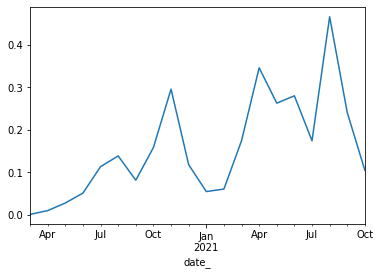

In [183]:
Afghan_data.loc[:, 'mortality_per_million'].plot(kind='line')

<AxesSubplot:xlabel='date_'>

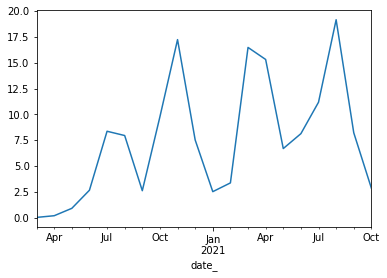

In [184]:
Afghan_data.loc[:, 'morbidity_per_million'].plot(kind='line')

<AxesSubplot:xlabel='date_'>

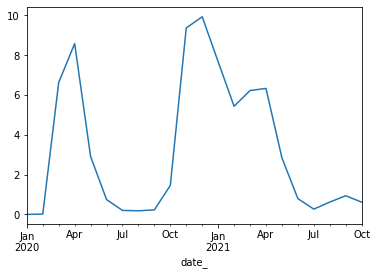

In [186]:
Afghan_data.loc[:, 'mortality_per_million'].plot(kind='line')

<AxesSubplot:xlabel='date_'>

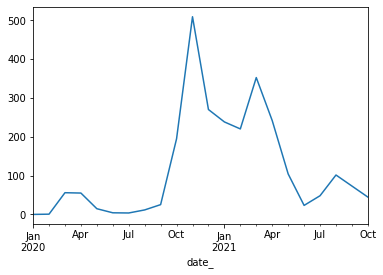

In [187]:
Afghan_data.loc[:, 'morbidity_per_million'].plot(kind='line')

<AxesSubplot:xlabel='date_'>

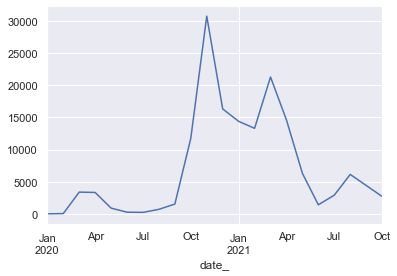

In [195]:
Afghan_data.loc[:, 'new_cases'].plot(kind='line', )

In [198]:
nx = Afghan_data.loc[:, ['new_cases', 'new_deaths']]

In [208]:
nx.index.to_series

<bound method Index.to_series of PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10'],
            dtype='period[M]', name='date_')>

TypeError: Invalid object type at position 0

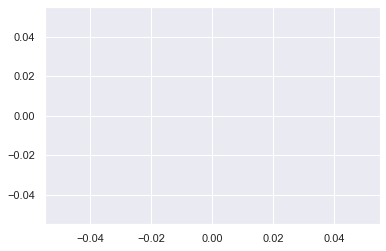

In [205]:
sns.lineplot(data=nx, x=nx.index, y='new_cases')